# APPS Data Science Interview

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Exploratory Data Analysis

### Reading the data

In [2]:
events = pd.read_csv("data/interview_events.csv", parse_dates=["client_ts"])
revenue = pd.read_csv("data/interview_revenue.csv", parse_dates=["revenue_day"])

In [121]:
df_event = events.copy()
df_revenue = revenue.copy()

In [122]:
df_event.head()

,user_id,client_ts,event_id,value,version,country_code,os_type
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android


In [123]:
df_revenue.head()

,user_id,revenue_day,revenue
0,7799779337307357843,2019-12-01,0.015406
1,2903532465681507879,2019-12-01,0.019093
2,7271844357181366660,2019-12-01,0.011785
3,-6989185766557698704,2019-12-01,0.013538
4,-1388044436100964633,2019-12-01,0.002288


### Quick describe

In [124]:
df_event.describe()

,user_id,value
count,1.748861e+06,163353.000000
mean,4.285007e+17,9371.457230
std,5.275562e+18,9685.325311
min,-9.215535e+18,0.000000
25%,-4.195582e+18,2338.551514
50%,3.874869e+17,5841.362305
75%,5.245853e+18,13100.709961
max,9.221849e+18,58292.910156


In [125]:
df_revenue.describe()

,user_id,revenue
count,1.130100e+04,11301.000000
mean,2.532177e+17,0.009418
std,5.291514e+18,0.027578
min,-9.215535e+18,0.000000
25%,-4.339658e+18,0.000205
50%,3.276463e+17,0.002805
75%,4.863665e+18,0.009284
max,9.221849e+18,0.941032


### Check size of data cuz why not?

In [6]:
print(len(df_revenue))
print(len(df_event))

11301
1748861


### First things first need to seperate date values (in the hindsight this didn't make too much use to me)

In [7]:
df_event["year"] = df_event.client_ts.dt.year
df_event["month"] = df_event.client_ts.dt.month
df_event["day"] = df_event.client_ts.dt.day
df_event["hour"] = df_event.client_ts.dt.hour
df_event["minute"] = df_event.client_ts.dt.minute
df_event["seconds"] = df_event.client_ts.dt.second

df_revenue["year"] = df_revenue.revenue_day.dt.year
df_revenue["month"] = df_revenue.revenue_day.dt.month
df_revenue["day"] = df_revenue.revenue_day.dt.day

In [8]:
df_event.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6


In [9]:
df_revenue.head()

,user_id,revenue_day,revenue,year,month,day
0,7799779337307357843,2019-12-01,0.015406,2019,12,1
1,2903532465681507879,2019-12-01,0.019093,2019,12,1
2,7271844357181366660,2019-12-01,0.011785,2019,12,1
3,-6989185766557698704,2019-12-01,0.013538,2019,12,1
4,-1388044436100964633,2019-12-01,0.002288,2019,12,1


### Let's check if we need month and year values my guess is we don't (normally you don't do this)

In [10]:
print(df_event.year.unique())
print(df_event.month.unique())
print(df_revenue.year.unique())
print(df_revenue.month.unique())

[2019 2015]
[12 11  1]
[2019 2020]
[12  1]


### To my surprise there are actually more than one year and one month of data in this set
### So I'm gonna check if data from 2015 is sizeable enough to consider

In [11]:
df_event.reset_index().groupby("year").nunique()

,index,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds
year,,,,,,,,,,,,,,
2015,132,1,121,36,11,1,1,1,1,1,1,1,18,54
2019,1748729,1768,792898,2085,148599,5,12,1,1,2,23,24,60,60


### Data from 2015 has too small of a sample size so I'm just gonna drop it

In [12]:
print(len(df_event))
df_event = df_event[df_event.year != 2015]
len(df_event)

1748861


1748729

### Let's split event_id since it contains several information in one column

In [13]:
df_event["event_name"], df_event["level"] = df_event["event_id"].str.split(':', 1).str
df_event["description"], df_event["level"] = df_event["level"].str.split(':', 1).str
df_event.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds,event_name,level,description
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45,Start,L0,turkish
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55,Complete,L0,turkish
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56,app,NaN,gameScore
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4,Start,L1,turkish
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6,wrong,L1,turkish


In [14]:
df_event.level.fillna("L-1", inplace=True)

### Now to One Hot Encode categories
### Also it's time to drop unwanted columns

In [15]:
df_event.event_name = df_event.event_name.str.lower()
event_name_one_hot = pd.get_dummies(df_event.event_name, prefix="event_name", drop_first=True)
level_one_hot = pd.get_dummies(df_event.level, prefix="level", drop_first=True)

In [16]:
df_event = pd.concat([df_event, event_name_one_hot, level_one_hot], axis=1)

In [17]:
df_event.drop(columns=["value", "country_code", "os_type", "level_L-1", "description", "event_id"], inplace=True)

In [18]:
df_event.head()

,user_id,client_ts,version,year,month,day,hour,minute,seconds,event_name,...,level_PL27,level_PL28,level_PL29,level_PL3,level_PL4,level_PL5,level_PL6,level_PL7,level_PL8,level_PL9
0,-9215534650345115924,2019-12-01 17:36:45+00:00,1.20.00,2019,12,1,17,36,45,start,...,0,0,0,0,0,0,0,0,0,0
1,-9215534650345115924,2019-12-01 17:36:55+00:00,1.20.00,2019,12,1,17,36,55,complete,...,0,0,0,0,0,0,0,0,0,0
2,-9215534650345115924,2019-12-01 17:36:56+00:00,1.20.00,2019,12,1,17,36,56,app,...,0,0,0,0,0,0,0,0,0,0
3,-9215534650345115924,2019-12-01 17:37:04+00:00,1.20.00,2019,12,1,17,37,4,start,...,0,0,0,0,0,0,0,0,0,0
4,-9215534650345115924,2019-12-01 17:37:06+00:00,1.20.00,2019,12,1,17,37,6,wrong,...,0,0,0,0,0,0,0,0,0,0


### Quick graph to show I can use matplotlib/seaborn but it shows no interesting information cuz I got no imagination

In [19]:
graph_data = df_event.reset_index().groupby("version").nunique()

In [20]:
graph_data = pd.DataFrame(graph_data.user_id)
graph_data.reset_index(inplace=True)

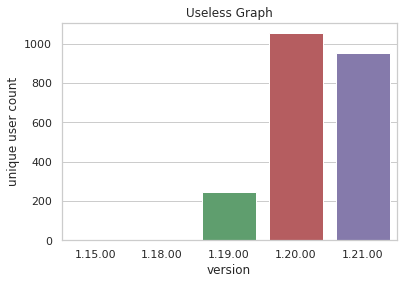

In [21]:
sns.set(style="whitegrid")
ax = sns.barplot(x="version", y="user_id", data=graph_data)

ax.set(xlabel="version", ylabel="unique user count", title="Useless Graph")

plt.show()

### To be fair it shows version 1.21 didn't gain many new users when it launched

### Need to get sign up dates of users for retention

In [22]:
df_event["event_date"] = df_event.client_ts.dt.strftime("%Y-%m-%d")
signup_dates = pd.DataFrame(df_event.groupby("user_id").event_date.min())

In [23]:
signup_dates.reset_index(inplace=True)
signup_dates.columns = ["user_id", "signup_date"]
signup_dates.head()

,user_id,signup_date
0,-9215534650345115924,2019-12-01
1,-9215240100939776087,2019-12-03
2,-9202484284851622629,2019-12-01
3,-9197151025395411316,2019-12-03
4,-9167946499694210868,2019-12-07


In [24]:
df_event = df_event.join(signup_dates.set_index("user_id"), on="user_id")
df_event.head()

,user_id,client_ts,version,year,month,day,hour,minute,seconds,event_name,...,level_PL29,level_PL3,level_PL4,level_PL5,level_PL6,level_PL7,level_PL8,level_PL9,event_date,signup_date
0,-9215534650345115924,2019-12-01 17:36:45+00:00,1.20.00,2019,12,1,17,36,45,start,...,0,0,0,0,0,0,0,0,2019-12-01,2019-12-01
1,-9215534650345115924,2019-12-01 17:36:55+00:00,1.20.00,2019,12,1,17,36,55,complete,...,0,0,0,0,0,0,0,0,2019-12-01,2019-12-01
2,-9215534650345115924,2019-12-01 17:36:56+00:00,1.20.00,2019,12,1,17,36,56,app,...,0,0,0,0,0,0,0,0,2019-12-01,2019-12-01
3,-9215534650345115924,2019-12-01 17:37:04+00:00,1.20.00,2019,12,1,17,37,4,start,...,0,0,0,0,0,0,0,0,2019-12-01,2019-12-01
4,-9215534650345115924,2019-12-01 17:37:06+00:00,1.20.00,2019,12,1,17,37,6,wrong,...,0,0,0,0,0,0,0,0,2019-12-01,2019-12-01


### Now to calculate seniority

In [25]:
df_event.event_date = pd.to_datetime(df_event.event_date)
df_event.signup_date = pd.to_datetime(df_event.signup_date)
df_event["seniority"] = (df_event.event_date - df_event.signup_date).dt.days + 1

df_event.sample(10)

,user_id,client_ts,version,year,month,day,hour,minute,seconds,event_name,...,level_PL3,level_PL4,level_PL5,level_PL6,level_PL7,level_PL8,level_PL9,event_date,signup_date,seniority
1312387,5245853075671718477,2019-12-05 21:45:06+00:00,1.20.00,2019,12,5,21,45,6,wrong,...,0,0,0,0,0,0,0,2019-12-05,2019-12-02,4
1378481,5730063207621787103,2019-12-15 08:54:17+00:00,1.21.00,2019,12,15,8,54,17,wrong,...,0,0,0,0,0,0,0,2019-12-15,2019-12-15,1
196006,-6641189379795499163,2019-12-09 22:32:28+00:00,1.20.00,2019,12,9,22,32,28,wrong,...,0,0,0,0,0,0,0,2019-12-09,2019-12-01,9
1121508,3386233642056579284,2019-12-14 08:49:53+00:00,1.21.00,2019,12,14,8,49,53,wrong,...,0,0,0,0,0,0,0,2019-12-14,2019-12-07,8
353084,-5005496348531420008,2019-12-15 11:38:13+00:00,1.21.00,2019,12,15,11,38,13,app,...,0,0,0,0,0,0,0,2019-12-15,2019-12-15,1
132726,-7364649605777926964,2019-12-13 19:24:30+00:00,1.21.00,2019,12,13,19,24,30,wrong,...,0,0,0,0,0,0,0,2019-12-13,2019-12-12,2
1251443,4583478152970396212,2019-12-13 08:05:51+00:00,1.21.00,2019,12,13,8,5,51,wrong,...,0,0,0,0,0,0,0,2019-12-13,2019-12-08,6
1266253,4812426411769077545,2019-12-13 09:57:27+00:00,1.21.00,2019,12,13,9,57,27,wrong,...,0,0,0,0,0,0,0,2019-12-13,2019-12-10,4
1537897,7139271607104919810,2019-12-10 20:19:53+00:00,1.19.00,2019,12,10,20,19,53,wrong,...,0,0,0,0,0,0,0,2019-12-10,2019-12-01,10
693679,-1624109939185739379,2019-12-07 20:21:52+00:00,1.20.00,2019,12,7,20,21,52,wrong,...,0,0,0,0,0,0,0,2019-12-07,2019-12-04,4


# 2. Retention Calculation

In [26]:
group = df_event.groupby(["signup_date", "seniority"])
cohort_data = group["user_id"].size()
cohort_data = cohort_data.reset_index()
cohort_data

,signup_date,seniority,user_id
0,2019-11-19,1,822
1,2019-11-20,1,1
2,2019-11-20,2,38
3,2019-11-20,4,9
4,2019-11-20,20,13
...,...,...,...
155,2019-12-13,2,18687
156,2019-12-13,3,7972
157,2019-12-14,1,35417
158,2019-12-14,2,16007


In [27]:
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='user_id')
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)

In [28]:
retention = cohort_counts.divide(base, axis=0).round(3)

# Quick trick to show a much nicer heatmap
retention_first_week = retention.loc[:, :8]
retention_first_week = retention_first_week[4:]

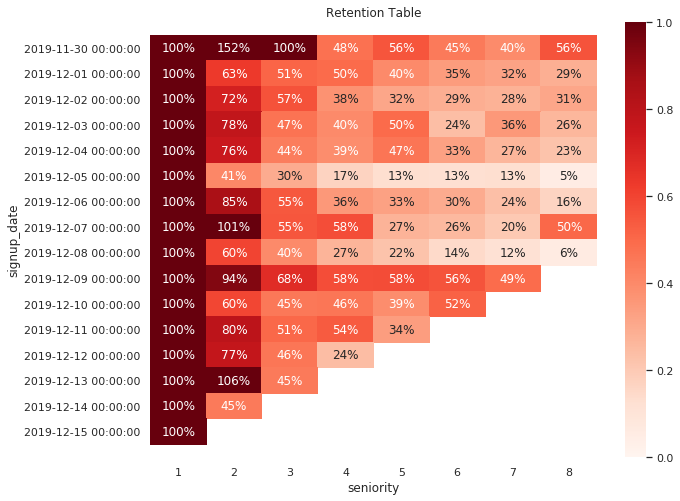

In [29]:
plt.figure(figsize=(10,8))
plt.title('Retention Table')
ax = sns.heatmap(data=retention_first_week, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_first_week.index)

# Turns out there is a bug in matplotlib
ax.set_ylim(len(retention_first_week)+0.5, -0.5)

fig=ax.get_figure()

plt.show()

# 3. RFM Analysis

In [30]:
df_total_completion_each_day = df_event.groupby(["user_id", "event_date"], as_index=False).event_name_complete.sum()
df_total_completion_each_day.head()

,user_id,event_date,event_name_complete
0,-9215534650345115924,2019-12-01,60.0
1,-9215534650345115924,2019-12-02,35.0
2,-9215534650345115924,2019-12-03,10.0
3,-9215534650345115924,2019-12-04,4.0
4,-9215534650345115924,2019-12-05,14.0


### Let's take the average of each user's level completion per day

In [31]:
df_rfm = df_total_completion_each_day.groupby("user_id", as_index=False).event_name_complete.mean()
df_rfm.head()

,user_id,event_name_complete
0,-9215534650345115924,15.888889
1,-9215240100939776087,25.500000
2,-9202484284851622629,7.000000
3,-9197151025395411316,22.000000
4,-9167946499694210868,8.000000


In [32]:
recency = pd.DataFrame(df_total_completion_each_day.groupby("user_id").nunique().event_date)
recency.reset_index(inplace=True)
recency.columns = ["user_id", "recency"]

In [33]:
df_rfm = df_rfm.join(recency.set_index("user_id"), on="user_id")
df_rfm

,user_id,event_name_complete,recency
0,-9215534650345115924,15.888889,9
1,-9215240100939776087,25.500000,12
2,-9202484284851622629,7.000000,1
3,-9197151025395411316,22.000000,2
4,-9167946499694210868,8.000000,1
...,...,...,...
1763,9205712211459362688,20.000000,1
1764,9210908092972712517,14.000000,1
1765,9215640541058628139,22.000000,4
1766,9215693985055962487,35.000000,1


### I'm not sure this is upper portion since a first day user has a recency of 9 but it should 1. This may cause problems since this is a data leak (Information comes from future) But if you are analyzing the data in the future and trying come up with ideas this may be right.

In [34]:
total_revenue = pd.DataFrame(df_revenue.groupby("user_id")["revenue"].sum())
total_revenue.reset_index(inplace=True)
total_revenue.head()

,user_id,revenue
0,-9215534650345115924,0.006209
1,-9215240100939776087,0.089060
2,-9202484284851622629,0.003801
3,-9197151025395411316,0.005653
4,-9167946499694210868,0.013754


### Same goes for the total revenue as well

In [35]:
df_rfm = df_rfm.join(total_revenue.set_index("user_id"), on="user_id")
df_rfm.head()

,user_id,event_name_complete,recency,revenue
0,-9215534650345115924,15.888889,9,0.006209
1,-9215240100939776087,25.500000,12,0.089060
2,-9202484284851622629,7.000000,1,0.003801
3,-9197151025395411316,22.000000,2,0.005653
4,-9167946499694210868,8.000000,1,0.013754


In [36]:
df_rfm.columns = ["user_id", "frequency", "recency", "monetary"]
df_rfm.head()

,user_id,frequency,recency,monetary
0,-9215534650345115924,15.888889,9,0.006209
1,-9215240100939776087,25.500000,12,0.089060
2,-9202484284851622629,7.000000,1,0.003801
3,-9197151025395411316,22.000000,2,0.005653
4,-9167946499694210868,8.000000,1,0.013754


In [37]:
df_rfm['r_quartile'] = pd.qcut(df_rfm['recency'], 2, ['1','2'], duplicates='drop') # I guess data is discontinous
df_rfm['f_quartile'] = pd.qcut(df_rfm['frequency'], 4, ['4','3','2','1'])
df_rfm['m_quartile'] = pd.qcut(df_rfm['monetary'], 4, ['4','3','2','1'])

In [38]:
df_rfm['r_quartile'] = df_rfm['r_quartile'].astype(int)
df_rfm['f_quartile'] = df_rfm['r_quartile'].astype(int)
df_rfm['m_quartile'] = df_rfm['r_quartile'].astype(int)

In [39]:
df_rfm['RFM_Segment'] = df_rfm.r_quartile.astype(str)+ df_rfm.f_quartile.astype(str) + df_rfm.m_quartile.astype(str)
df_rfm['RFM_Score'] = df_rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis = 1)

df_rfm.head()

,user_id,frequency,recency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score
0,-9215534650345115924,15.888889,9,0.006209,2,2,2,222,6
1,-9215240100939776087,25.500000,12,0.089060,2,2,2,222,6
2,-9202484284851622629,7.000000,1,0.003801,1,1,1,111,3
3,-9197151025395411316,22.000000,2,0.005653,1,1,1,111,3
4,-9167946499694210868,8.000000,1,0.013754,1,1,1,111,3


### Now for K-Means

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df_rfm_k_means = df_rfm.drop(columns=["user_id", "m_quartile", "f_quartile", "r_quartile", "RFM_Score", "RFM_Segment"])
scaler = StandardScaler()

In [41]:
df_rfm_k_means = scaler.fit_transform(df_rfm_k_means)

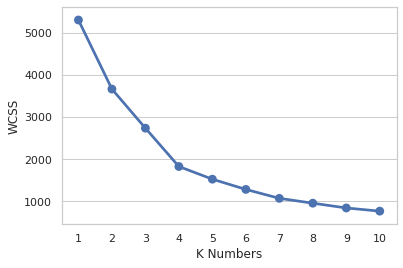

In [42]:
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
    kmeans.fit(df_rfm_k_means)
    wcss[k] = kmeans.inertia_

sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

### Well there isn't any clear elbow here but I guess 4 will do (The first time I did this there wasn't, always use random states)

In [43]:
kmeans = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300)
kmeans.fit(df_rfm_k_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
df_rfm["K_cluster"] = kmeans.labels_
df_rfm.head()

,user_id,frequency,recency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score,K_cluster
0,-9215534650345115924,15.888889,9,0.006209,2,2,2,222,6,2
1,-9215240100939776087,25.500000,12,0.089060,2,2,2,222,6,2
2,-9202484284851622629,7.000000,1,0.003801,1,1,1,111,3,1
3,-9197151025395411316,22.000000,2,0.005653,1,1,1,111,3,1
4,-9167946499694210868,8.000000,1,0.013754,1,1,1,111,3,1


# 4. Churn Prediction

So my idea here is to create a 7 seven day sequential data for each customer.
In this data I want to show what each user did in that day; how many games did they play, how many did they completed and how many times they failed. I also want to integrate revenue data to show how much a user spent in that day. Lastly I want to include which level the user played last in that day. (Because if I feel a level is imbalanced and repetitively fail on that level I would definitely leave that game.)

After data cleaning I'm going to use LinearSVC to classify churn. You may ask why and I would answer because I like it's name and there is no reason to test several algorithms on such a small sample of a dataset.

I also might try LSTM cuz it's sequence but I don't know.

### Let's start over cuz I forgot what I did

In [45]:
df_event = events.copy()
df_revenue = revenue.copy()

In [46]:
df_revenue.columns = ['user_id', 'event_date', 'revenue']

In [47]:
df_event["year"] = df_event.client_ts.dt.year

In [48]:
print(len(df_event))
df_event = df_event[df_event.year != 2015]
len(df_event)

1748861


1748729

In [49]:
df_event["event_name"], df_event["level"] = df_event["event_id"].str.split(':', 1).str
df_event["description"], df_event["level"] = df_event["level"].str.split(':', 1).str
df_event.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,event_name,level,description
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,Start,L0,turkish
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,Complete,L0,turkish
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,app,NaN,gameScore
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,Start,L1,turkish
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,wrong,L1,turkish


### L-1 is the name I gave for the events that show game score which I do not need so I'm just going to drop them

In [50]:
df_event.level.fillna("L-1", inplace=True)

In [51]:
df_event.event_name = df_event.event_name.str.lower()
df_event["event_date"] = df_event.client_ts.dt.strftime("%Y-%m-%d")

signup_dates = pd.DataFrame(df_event.groupby("user_id").event_date.min())
signup_dates.reset_index(inplace=True)
signup_dates.columns = ["user_id", "signup_date"]
signup_dates.head()

df_event = df_event.join(signup_dates.set_index("user_id"), on="user_id")
df_event.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,event_name,level,description,event_date,signup_date
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,start,L0,turkish,2019-12-01,2019-12-01
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,complete,L0,turkish,2019-12-01,2019-12-01
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,app,L-1,gameScore,2019-12-01,2019-12-01
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,start,L1,turkish,2019-12-01,2019-12-01
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,wrong,L1,turkish,2019-12-01,2019-12-01


### Drop some unwanted rows

In [52]:
df_event.drop(columns=["event_id", "value", "version", "country_code", "os_type", "year", "description"], inplace=True)

In [53]:
df_event.head()

,user_id,client_ts,event_name,level,event_date,signup_date
0,-9215534650345115924,2019-12-01 17:36:45+00:00,start,L0,2019-12-01,2019-12-01
1,-9215534650345115924,2019-12-01 17:36:55+00:00,complete,L0,2019-12-01,2019-12-01
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app,L-1,2019-12-01,2019-12-01
3,-9215534650345115924,2019-12-01 17:37:04+00:00,start,L1,2019-12-01,2019-12-01
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong,L1,2019-12-01,2019-12-01


### Let's see what's the latest day in our data

In [54]:
df_event.client_ts.max()

Timestamp('2019-12-15 23:59:56+0000', tz='UTC')

### We need to eliminate data contaning users signing up after 9 of December since we don't have any access to data after 15th of December

In [55]:
print(len(df_event))
df_event.signup_date = pd.to_datetime(df_event.signup_date)
df_event.event_date = pd.to_datetime(df_event.event_date)
df_event = df_event[df_event.signup_date < '2019-12-09']

1748729


In [56]:
event_name_one_hot = pd.get_dummies(df_event.event_name, prefix="event_name", drop_first=True)
df_event = pd.concat([df_event, event_name_one_hot], axis=1)
len(df_event)

1362814

In [57]:
df_event.head()

df_event = df_event[df_event.level != 'L-1']

### Quick data transformations

In [58]:
df_event_agg = df_event.groupby(["user_id", "event_date", "signup_date"], as_index=False).agg({'event_name_complete':'sum', 'event_name_wrong': 'sum', 'level': 'last'})

In [59]:
df_event_agg.head()

,user_id,event_date,signup_date,event_name_complete,event_name_wrong,level
0,-9215534650345115924,2019-12-01,2019-12-01,60.0,593.0,L60
1,-9215534650345115924,2019-12-02,2019-12-01,35.0,702.0,L94
2,-9215534650345115924,2019-12-03,2019-12-01,10.0,365.0,L103
3,-9215534650345115924,2019-12-04,2019-12-01,4.0,266.0,L107
4,-9215534650345115924,2019-12-05,2019-12-01,14.0,237.0,L120


### I used inner join cuz I only want the matching data from revenues

In [60]:
churn_data = pd.merge(df_event_agg, df_revenue, on=['user_id', 'event_date'], how='inner')

In [61]:
churn_data["total_event_count"] = churn_data.event_name_complete + churn_data.event_name_wrong
level_one_hot = pd.get_dummies(churn_data.level, prefix="level", drop_first=True)
churn_data = pd.concat([churn_data, level_one_hot], axis=1)
churn_data.head()

,user_id,event_date,signup_date,event_name_complete,event_name_wrong,level,revenue,total_event_count,level_DL1,level_DL10,...,level_PL2,level_PL20,level_PL29,level_PL3,level_PL4,level_PL5,level_PL6,level_PL7,level_PL8,level_PL9
0,-9215534650345115924,2019-12-01,2019-12-01,60.0,593.0,L60,0.001145,653.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-9215534650345115924,2019-12-02,2019-12-01,35.0,702.0,L94,0.000000,737.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-9215534650345115924,2019-12-03,2019-12-01,10.0,365.0,L103,0.000000,375.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-9215534650345115924,2019-12-04,2019-12-01,4.0,266.0,L107,0.000000,270.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-9215534650345115924,2019-12-05,2019-12-01,14.0,237.0,L120,0.000000,251.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### This function takes the dataframe and creates a row by row sequential data for each unique user

In [62]:
from datetime import timedelta
def create_sequential_data(df):
    result = []
    for i in df.user_id.unique():
        user_df = df[df.user_id == i].reset_index()
        first_seven_days = user_df[:6]
        sign_up_date = user_df.reset_index().signup_date.loc[0]
        churn = user_df.event_date.max() < sign_up_date + timedelta(days=6)
        
        first_seven_days.drop(columns=["user_id", "event_date", "signup_date", "level"], inplace=True)
        
        values = first_seven_days.unstack().tolist()[6:]
        values.append(churn)
        
        result.append(values)
    return pd.DataFrame(result)

In [63]:
transformed_data = create_sequential_data(churn_data)

/home/ilke/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
len(transformed_data)

1102

### Returned value had no column names so column indices had to make do

In [65]:
# Quick hacks not advised
transformed_data[3378] = transformed_data[3378].fillna(True)
transformed_data = transformed_data.fillna(0)

In [66]:
transformed_data[3378].value_counts()

True     843
False    259
Name: 3378, dtype: int64

### Data split is quite okay

In [67]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [68]:
X = transformed_data.drop(3378, axis=1)
y = transformed_data[3378]

### Yeah let's skip 10-fold 1-fold is enough

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
svm = LinearSVC(random_state=42, tol=1e-5)

In [78]:
svm.fit(X_train, y_train)

/home/ilke/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
          verbose=0)

In [79]:
y_pred = svm.predict(X_test)

### Only F1-Score because it's my favourite classification metric

In [113]:
f1_score(y_true=y_test, y_pred=y_pred, average='macro')

0.9960815975025568

### Such an amazing score which means it probably overfit

In [84]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 82,   0],
       [  1, 281]])

(2.5, -0.5)

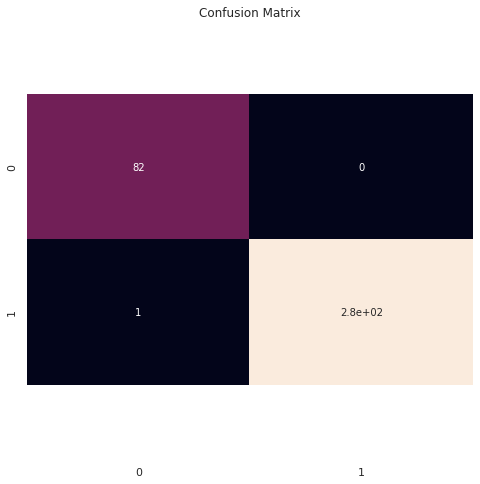

In [110]:
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix')
ax = sns.heatmap(matrix,annot=True,cbar=False)
ax.set_ylim(len(matrix)+0.5, -0.5)

### And this is the end of it. 

### Thanks.